# 01_data_overview.ipynb
数据加载、缺失值处理、时间与地理特征提取

---

## 1. 环境与导入

```python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
df = pd.read_csv('../data/processed/china_50_cities.csv', parse_dates=['Datetime'])
df.head()

,Datetime,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),...,RH,AH,Year,Month,Day,Hour,Weekday,Station,Latitude,Longitude
0,2004-03-10 18:00:00,10/03/2004,18:00:00,2.509794,1360.0,152.826897,12.133974,1046.0,164.243955,1056.0,...,48.9,0.7578,2004,3,10,18,2,北京,39.9042,116.4074
1,2004-03-10 19:00:00,10/03/2004,19:00:00,2.009519,1292.0,117.170080,9.689023,955.0,107.472823,1174.0,...,47.7,0.7255,2004,3,10,19,2,北京,39.9042,116.4074
2,2004-03-10 20:00:00,10/03/2004,20:00:00,2.095449,1402.0,84.478276,9.197203,939.0,129.208731,1140.0,...,54.0,0.7502,2004,3,10,20,2,北京,39.9042,116.4074
3,2004-03-10 21:00:00,10/03/2004,21:00:00,2.158427,1376.0,79.991206,9.619408,948.0,167.835396,1092.0,...,60.0,0.7867,2004,3,10,21,2,北京,39.9042,116.4074
4,2004-03-10 22:00:00,10/03/2004,22:00:00,1.599979,1272.0,51.206509,6.255312,836.0,136.141927,1205.0,...,59.6,0.7888,2004,3,10,22,2,北京,39.9042,116.4074


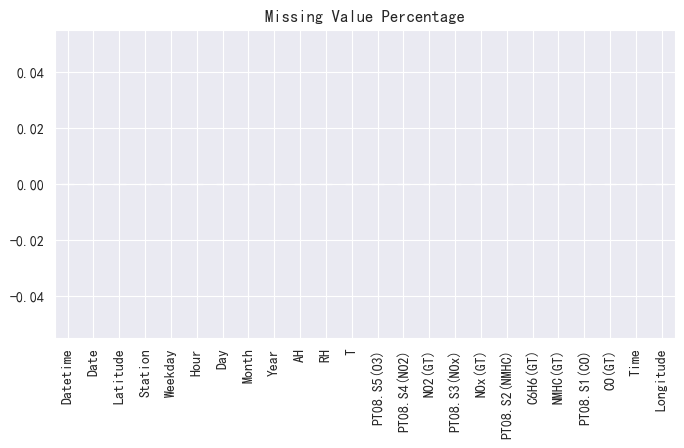

In [2]:
# 每列缺失比例
miss_pct = df.isnull().mean().sort_values(ascending=False)
miss_pct.plot.bar(figsize=(8,4), title='Missing Value Percentage')
plt.show()


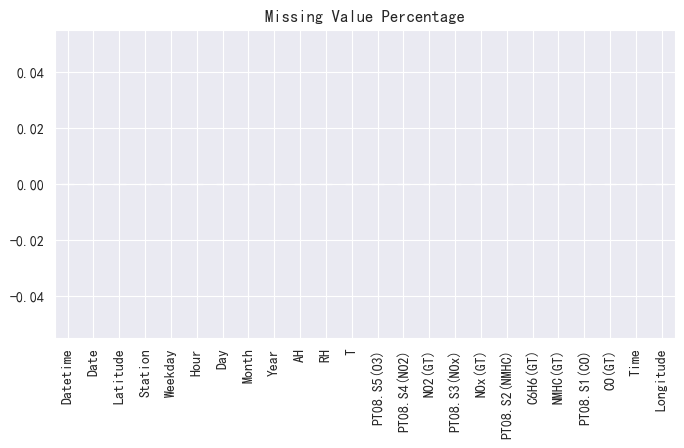

In [3]:
# 每列缺失比例
miss_pct = df.isnull().mean().sort_values(ascending=False)
miss_pct.plot.bar(figsize=(8,4), title='Missing Value Percentage')
plt.show()



时间范围： 2004-03-10 18:00:00 至 2005-04-04 14:00:00


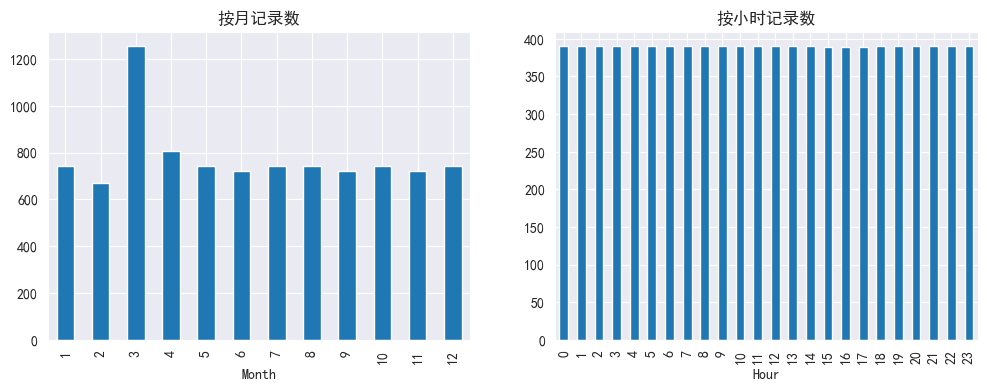

In [4]:
# 时间范围
print("时间范围：", df['Datetime'].min(), "至", df['Datetime'].max())

# 按月/小时记录数
fig, axes = plt.subplots(1,2, figsize=(12,4))
df['Month'].value_counts().sort_index().plot.bar(ax=axes[0], title='按月记录数')
df['Hour'].value_counts().sort_index().plot.bar(ax=axes[1], title='按小时记录数')
plt.show()


In [7]:
import folium

# 计算所有城市经纬度的平均值，作为地图中心
avg_lat = df['Latitude'].mean()
avg_lon = df['Longitude'].mean()

# 创建地图，居中到所有城市中心
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=5)

# 为每个城市添加彩色标记和弹出信息
for _, row in df[['Station','Latitude','Longitude']].drop_duplicates().iterrows():
    popup_text = f"{row.Station}<br>Latitude: {row.Latitude:.4f}<br>Longitude: {row.Longitude:.4f}"
    folium.Marker(
        location=[row.Latitude, row.Longitude],
        tooltip=row.Station,
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# 保存为html文件，方便浏览器打开
m.save('city_markers_map.html')
